In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-15 03:17:37,298: Credentials are already in use. The existing account in the session will be replaced.


Select the backend you want to characterize.  
And then, find out how many qubits are in our backend. Finally, let's find out all T1 values corresponding to our qubit.

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2021-10-15 03:17:45,876: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
# get the basic feautures including qubit number of the backend.
config = backend.configuration()

print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_lima, and is on version 1.0.19. It has 5 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [8]:
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1


get T1 results for all the qubit in the backend!

In [22]:
backend = backend
# Time intervals to wait before measurement
delays = list(range(1, 150, 5))

exps=[]

for i in range(config.n_qubits):
    exp = T1(qubit=i,
            delays=delays,
            unit="us")
    exps.append(exp)
    
 
print(exps)

[<qiskit_experiments.library.characterization.t1.T1 object at 0x7f80fa771670>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f80fa23ba90>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f80fa5d7df0>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f80fa5d7550>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f80c9b656a0>]


In [23]:
parallel_exp = ParallelExperiment(exps)
parallel_data = parallel_exp.run(backend, shots=8192).block_for_results()

In [25]:
# View result data
for result in parallel_data.analysis_results():
    print(result)
    print("\nextra:")
    print(result.extra)

DbAnalysisResultV1
- name: parallel_experiment
- value: 5
- extra: <2 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False

extra:
{'experiment_types': ['T1', 'T1', 'T1', 'T1', 'T1'], 'experiment_ids': ['f5c71a93-a669-450e-8f63-3efbb0ab018e', '4a0516d9-1498-4e25-a0fc-11ffd840febc', '58955995-7628-4840-9717-ef270586a175', 'c0a31409-2486-4f13-a58b-58ad7b8e8d49', '0aacc7be-61a4-4ecc-a032-ec05d9549977']}


Component experiment 0


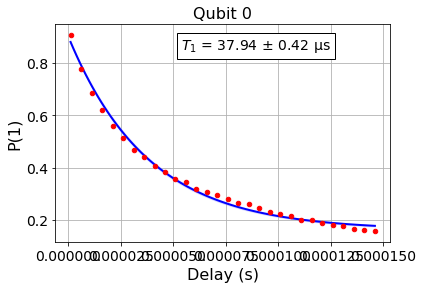

DbAnalysisResultV1
- name: T1
- value: 3.793899511830946e-05 ± 4.205404871408129e-07 s
- χ²: 13.477575463730659
- quality: bad
- extra: <9 items>
- device_components: ['Q0']
- verified: False
Component experiment 1


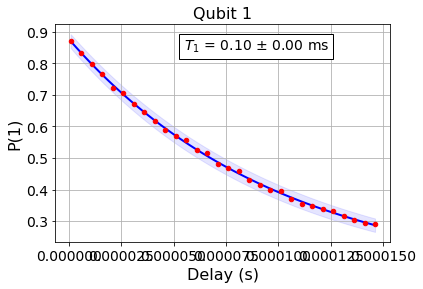

DbAnalysisResultV1
- name: T1
- value: 0.00010030840010108374 ± 2.8312003334509463e-06 s
- χ²: 0.9092277691261278
- quality: bad
- extra: <9 items>
- device_components: ['Q1']
- verified: False
Component experiment 2


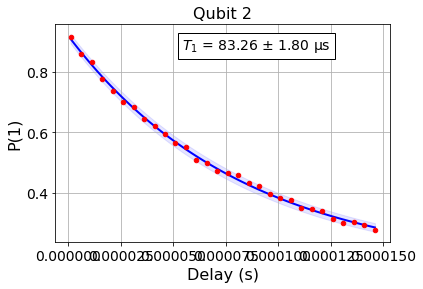

DbAnalysisResultV1
- name: T1
- value: 8.326375661824961e-05 ± 1.8014845284301873e-06 s
- χ²: 2.64716926310264
- quality: bad
- extra: <9 items>
- device_components: ['Q2']
- verified: False
Component experiment 3


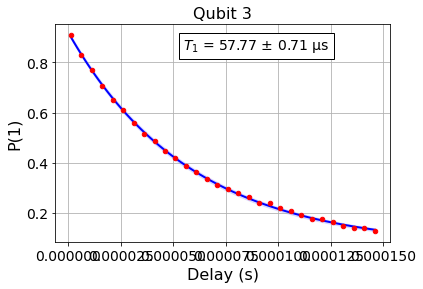

DbAnalysisResultV1
- name: T1
- value: 5.7774287619576864e-05 ± 7.129834065225329e-07 s
- χ²: 1.172019683509357
- quality: bad
- extra: <9 items>
- device_components: ['Q3']
- verified: False
Component experiment 4


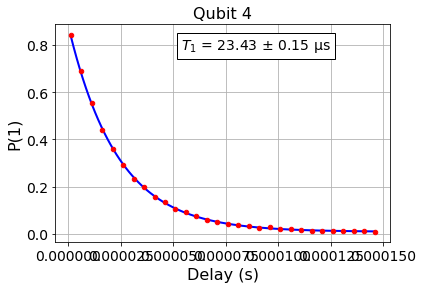

DbAnalysisResultV1
- name: T1
- value: 2.3431454259707927e-05 ± 1.4627185745907228e-07 s
- χ²: 1.2093884535667387
- quality: bad
- extra: <9 items>
- device_components: ['Q4']
- verified: False


In [24]:
# Print sub-experiment data
for i in range(parallel_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = parallel_data.component_experiment_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)